In [1]:
import os
#move up in directory
os.chdir('../')
#os.getcwd()

In [2]:
os.getcwd()

'C:\\Users\\Bio_Psych\\Desktop\\Deniz\\tf-cpu\\p1_generalization'

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather
from sklearn.metrics import mean_squared_error

from helpers import dot2_

In [4]:
# CONFIG

# FIT_PATH = 'data/intermediate_data/modeling/modeling_fits/'

RNN_TYPE = 'lstm_a2c'
RNN_ID = 0
RNN_RUN = 1
TEST_SD = 1
TRAIN_SD = '0_1'


RNN_FILE_STRING = '{}_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_{}_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_1'

In [13]:
# function to get dataset out of pickle file
# all_lstm_ac_continuous_test_runs_train_sd_meta_volatility_id_9_test_sd_0_06

def get_df_from_multindex_df(rnn_type = RNN_TYPE, rnn_id = RNN_ID,
                             rnn_run = RNN_RUN, test_sd = TEST_SD,
                             train_sd = TRAIN_SD, path_to_test_runs = 'data/rnn_raw_data/',
                             rnn_file_string = RNN_FILE_STRING):
        
    # convert test_sd into string
    test_sd = dot2_(test_sd)

    file_name = rnn_file_string.format(rnn_type, train_sd, rnn_id, test_sd)

    all_test_runs = pickle.load(open(path_to_test_runs + file_name, 'rb')) 

    # reset multiindex df
    df = all_test_runs.reset_index()
    # index rnn_run
#     df = df[df['run']==rnn_run]
    # reset index
    df = df.reset_index()
    
    # add run to file_name
    file_name = file_name + '_run_' + str(rnn_run)
    
    # return df
    return(df, file_name)

In [14]:
# function for plotting


def plot_performance(df, file_name, my_cols = ['red','blue','green','pink']):
    
    # get reward_probability 
    p_rews_cols = [word for word in df.columns if word.startswith('p_rew')] 
    p_rews = df[p_rews_cols]

    # get softmax activation
    sm_cols = [word for word in df.columns if word.startswith('softmax')] 
    sm = df[sm_cols]

    # prepare actions array
    ch_cols = [word for word in df.columns if word.startswith('choice')] 
    my_choices = df[ch_cols]
    actions = [1]*df.shape[0]

    # maybe use this instead of above 
    # df[['choice']]

    # get accuracy
    accuracy = np.mean(df['accuracy'])
    accuracy = 'Accuracy  = {}'.format(str(round(accuracy, 3)))

    # get proportion of switches
    is_switch = [int(df.choice[t] != df.choice[t-1]) for t in range(1, len(df.choice))]
    prop_switches = np.round(np.sum(is_switch)/len(is_switch),2)
    prop_switches = 'Prop. Switches = {}'.format(prop_switches)

    # plot
    fig, ax = plt.subplots(2,1, figsize=(10,5))

    for i, col in enumerate(my_cols):
        ax[0].plot(p_rews.iloc[:,i], color=col, linewidth = 2)
        ax[1].plot(sm.iloc[:, i], '--', color = col, linewidth = 1)

    # add legend
    ax[0].legend(['bandit 1', 'bandit 2', 'bandit 3', 'bandit 4'])

    # create color for actions
    tmp_col = []

    for col in range(my_choices['choice'].shape[0]):
        tmp_col.append(my_cols[int(my_choices['choice'].iloc[col])])

    ax[0].scatter(range(len(actions)), actions, c = tmp_col, s = 1)

    # labels
    ax[0].set(xlabel='', ylabel='Reward')
    ax[1].set(xlabel='Trial', ylabel='SM Prob.')

    # shared x-label
    ax[0].label_outer()

    # main title
    ax[0].set_title(file_name + '\n'+ accuracy + ', ' +  prop_switches)

# AC LSTM

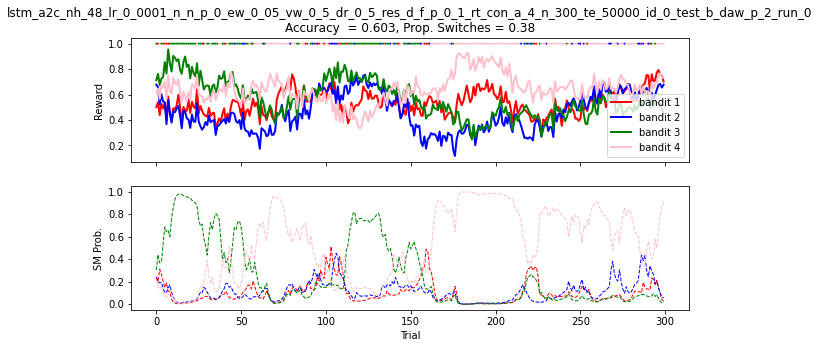

In [15]:
for run in range(RNN_RUN):
    df, file_name = get_df_from_multindex_df(rnn_run = run)
    plot_performance(df = df, file_name = file_name)

In [9]:
RNN_FILE_STRING = '{}_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_{}_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_2'

for run in range(RNN_RUN):
    df, file_name = get_df_from_multindex_df(rnn_run = run, rnn_file_string = RNN_FILE_STRING)
    plot_performance(df = df, file_name = file_name)

ImportError: Can't determine version for numexpr

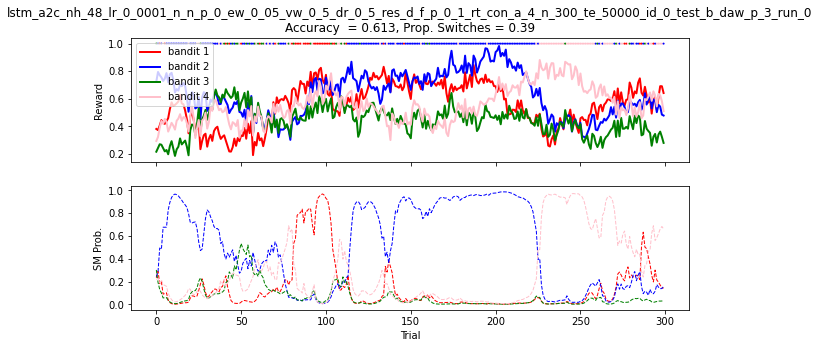

In [15]:
RNN_FILE_STRING = '{}_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_{}_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_3'

for run in range(RNN_RUN):
    df, file_name = get_df_from_multindex_df(rnn_run = run, rnn_file_string = RNN_FILE_STRING)
    plot_performance(df = df, file_name = file_name)

In [ ]:
for run in range(RNN_RUN):
    df, file_name = get_df_from_multindex_df(rnn_run = run)
    plot_performance(df = df, file_name = file_name)

# RNN (Train SD = meta-volatility)

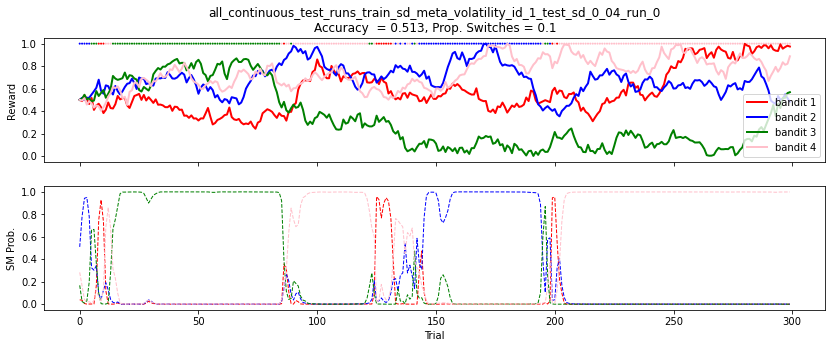

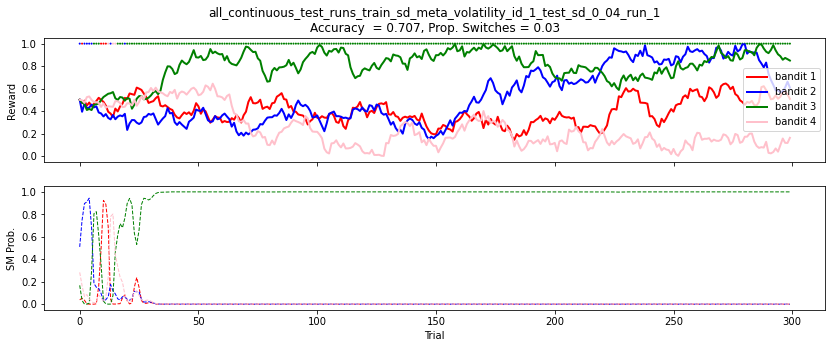

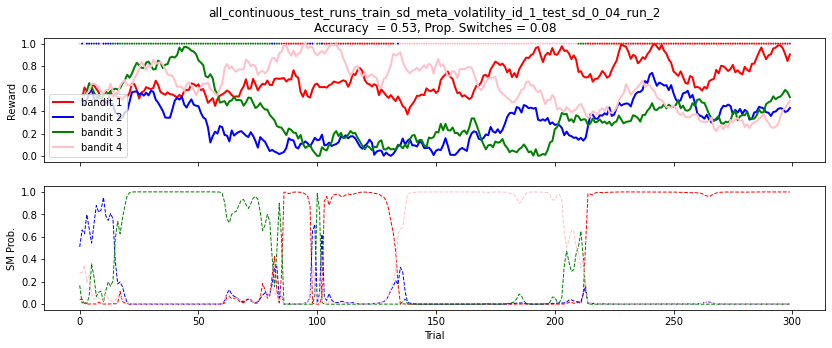

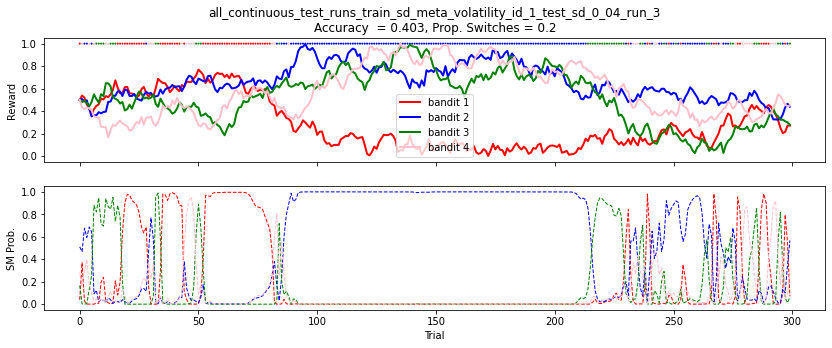

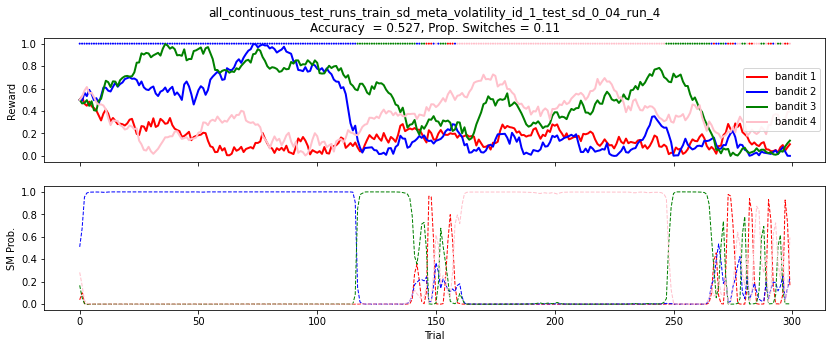

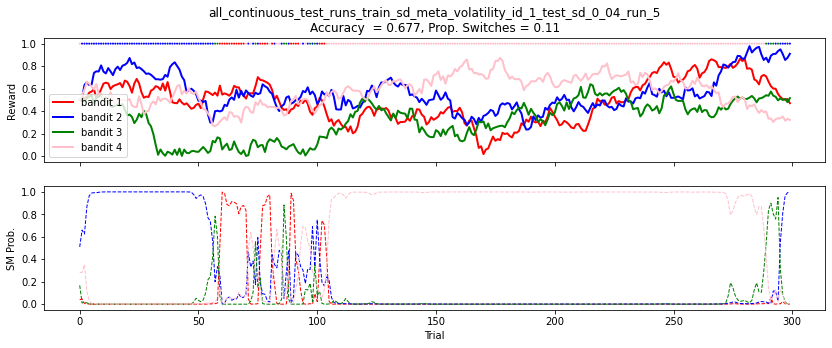

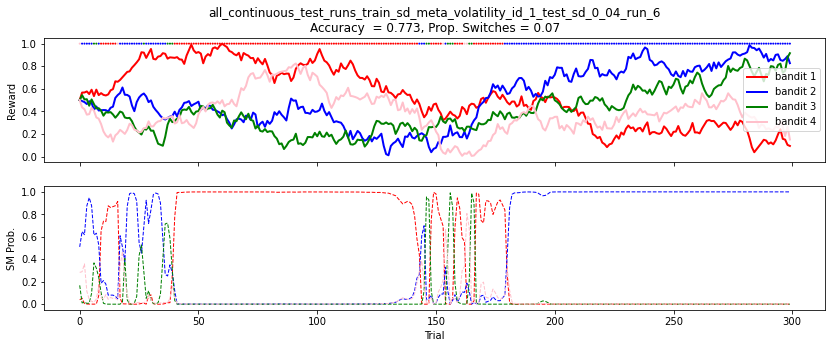

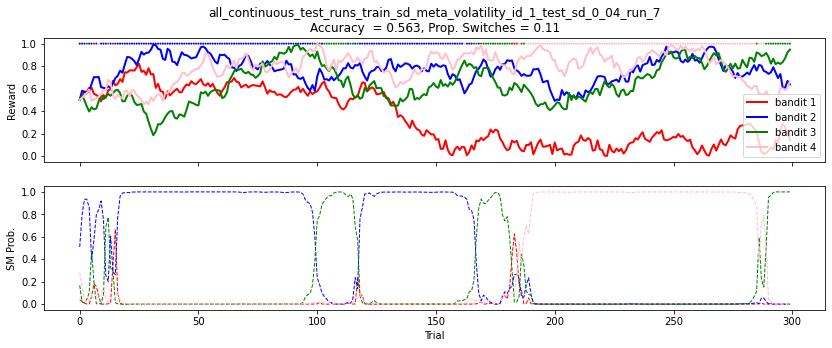

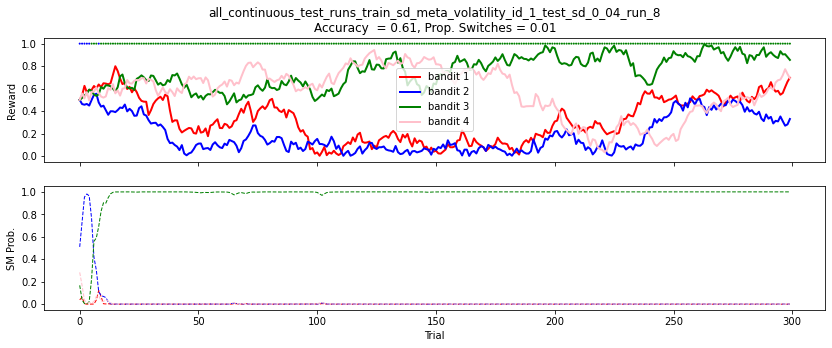

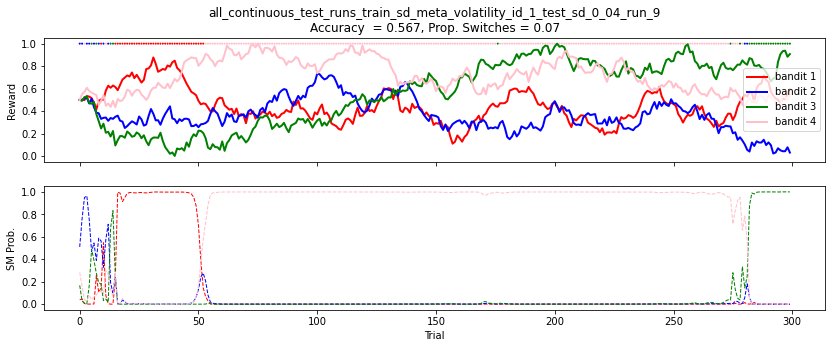

In [8]:
RNN_TYPE = 'continuous'

for run in range(RNN_RUN):
    df, file_name = get_df_from_multindex_df(rnn_run = run, rnn_type= RNN_TYPE)
    plot_performance(df = df, file_name = file_name)

# RNN (Train SD = .05)

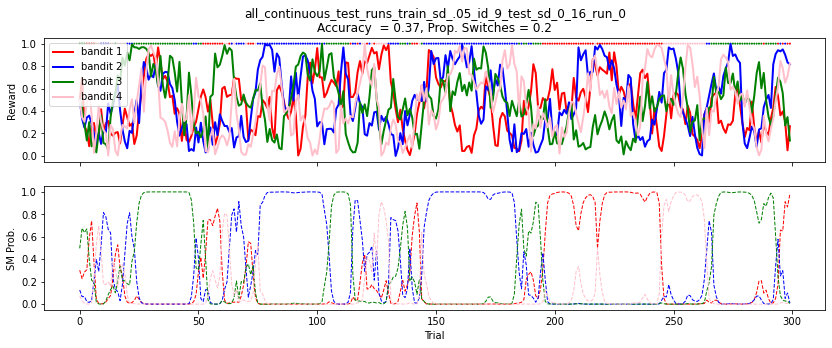

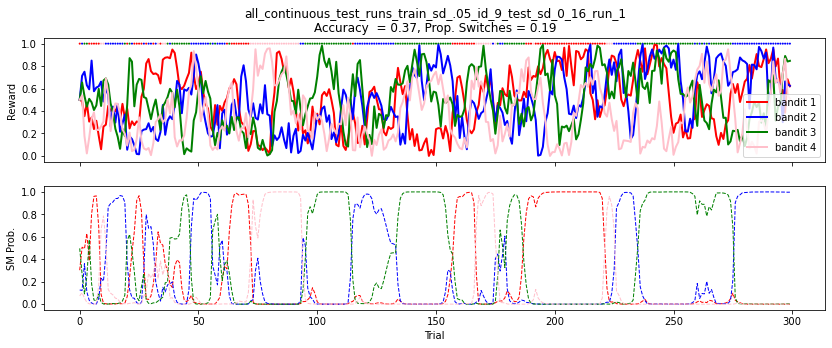

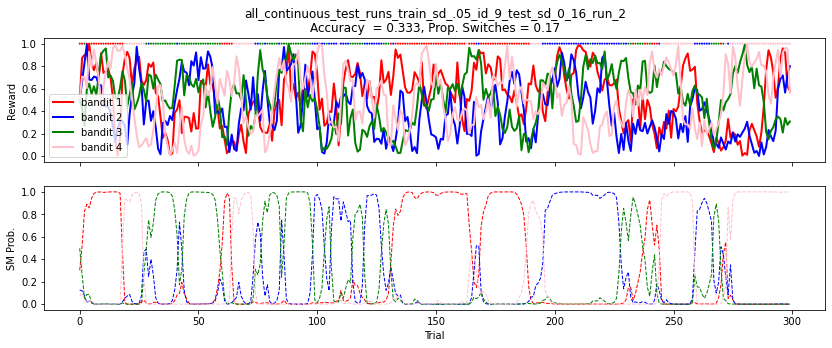

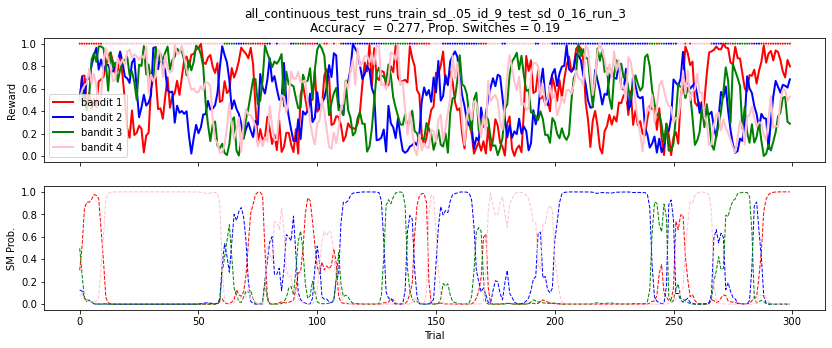

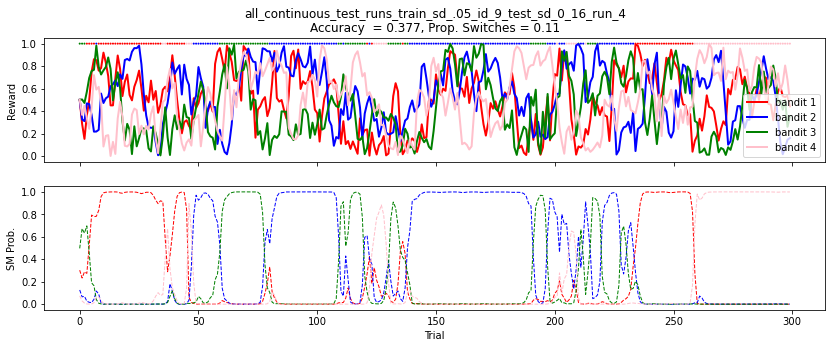

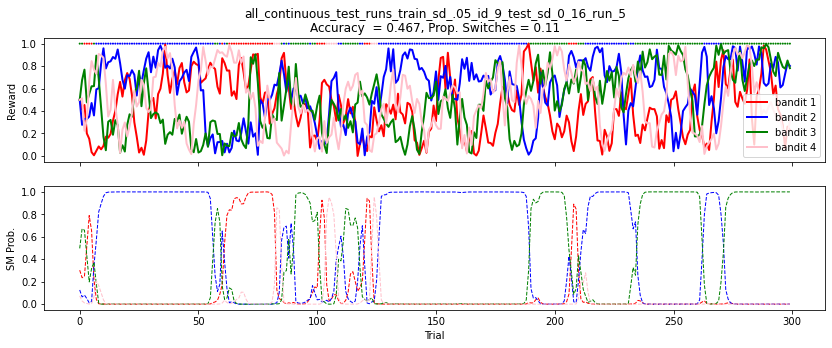

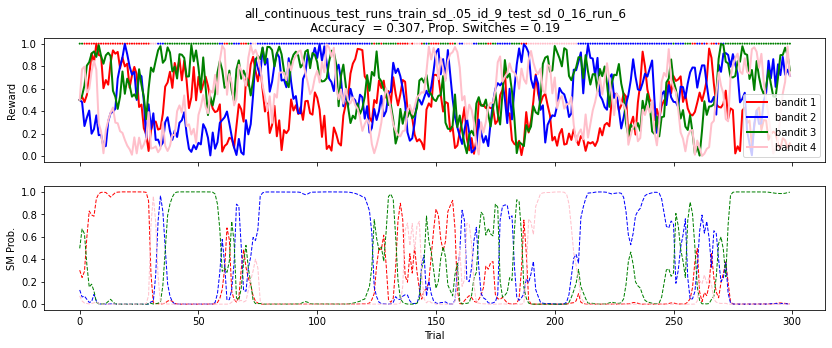

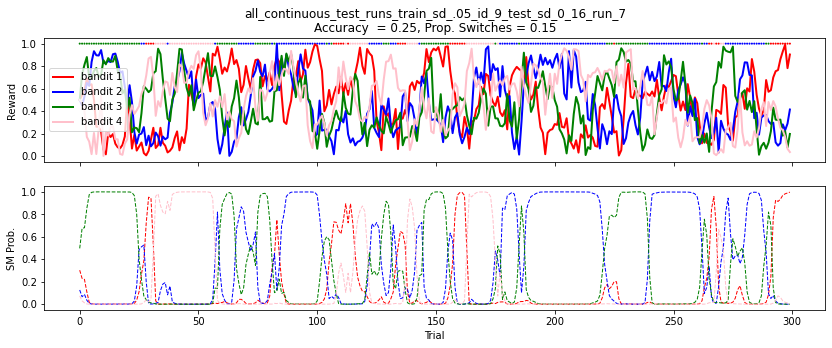

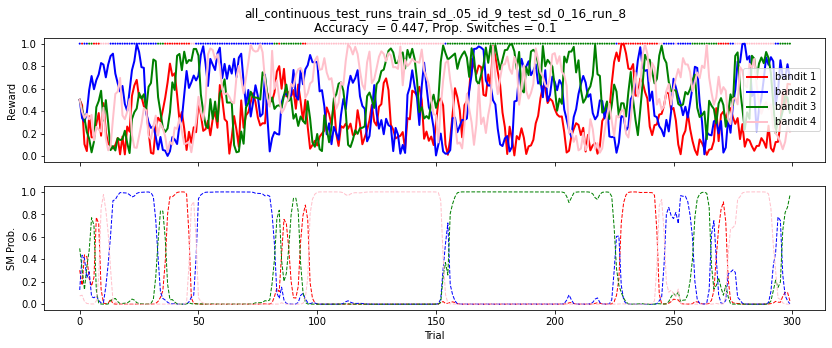

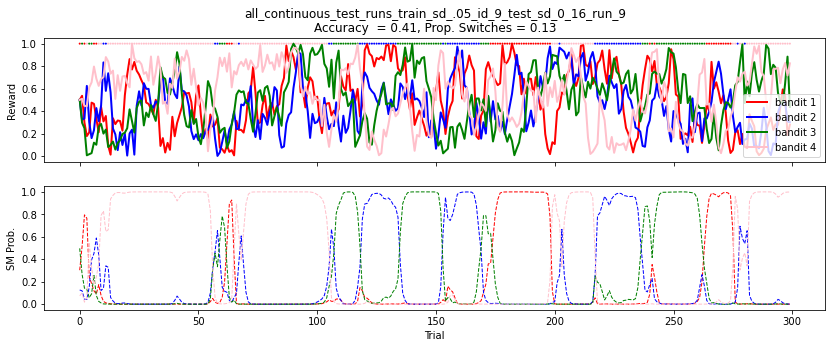

In [9]:
RNN_TYPE = 'continuous'
TRAIN_SD = '.05'

for run in range(RNN_RUN):
    df, file_name = get_df_from_multindex_df(rnn_run = run, rnn_type= RNN_TYPE, train_sd = TRAIN_SD)
    plot_performance(df = df, file_name = file_name)